In [1]:
import networkx as nx 
import matplotlib.pyplot as plt 
import random


# Función para graficar el grafo
def plot_graph(G, pos, title=""):
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=800, font_size=15, edge_color='gray', width=2)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title(title)
    plt.show()

# Función para fusionar dos nodos en un grafo
def merge_nodes(G, node1, node2):
    # Crear una copia del grafo para no modificar el original
    G = G.copy()
    
    # Asegúrate de que ambos nodos existan en el grafo
    if node1 not in G.nodes or node2 not in G.nodes:
        raise ValueError(f"One or both nodes ({node1}, {node2}) are not in the graph.")
    
    # Obtener los vecinos comunes entre node1 y node2
    common_nodes = sorted(nx.common_neighbors(G, node1, node2))

    new_edges_weights = []
    
    for node in common_nodes:
        weight_sum = G[node1][node].get('weight', 1) + G[node2][node].get('weight', 1)
        new_edges_weights.append([node, weight_sum])
    
    G = nx.contracted_nodes(G, node1, node2, self_loops=False)
    new_node = node1
    
    # Actualizar los pesos de las aristas incidentes al nuevo nodo
    for neighbor, weight_info in zip(common_nodes, new_edges_weights):
        neighbor_node = weight_info[0]
        weight_sum = weight_info[1]
        G[new_node][neighbor_node]['weight'] = weight_sum
    
    return G


def karger_min_cut_weighted(G, bool_plot):
    G = G.copy()  # Hacemos una copia para no modificar el original

    # Creamos posiciones fijas para los nodos
    pos = nx.spring_layout(G)
    
    iteration = 1
    
    # Mientras queden más de dos nodos en el grafo
    while len(G.nodes) > 2:
    
        # Elegimos una arista al azar
        u, v = random.choice(list(G.edges))
        
        # Contraemos la arista (fusionamos u y v)
        G = merge_nodes(G, u, v)
        
        if bool_plot == True:
            # Graficar el grafo después de la contracción
            plot_graph(G, pos, title=f"Iteración {iteration}: Grafo después de contraer {u} y {v}")
        
        iteration += 1

    # Encontramos los dos nodos restantes y calculamos el peso total de las aristas entre ellos
    remaining_nodes = list(G.nodes)
    u, v = remaining_nodes
    
    cut_weight = G[u][v].get('weight', 1)
    return cut_weight

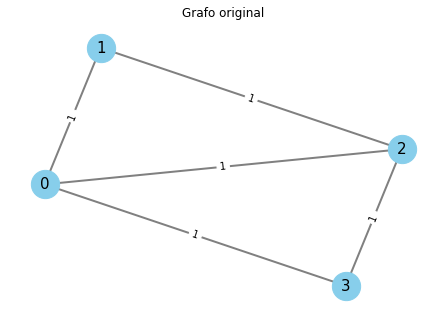

Iteracion 0


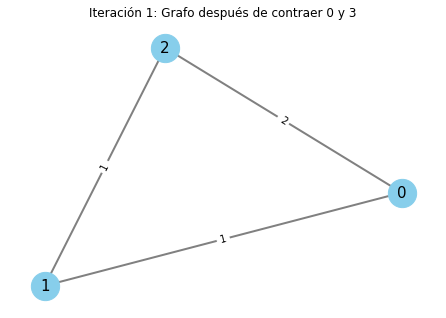

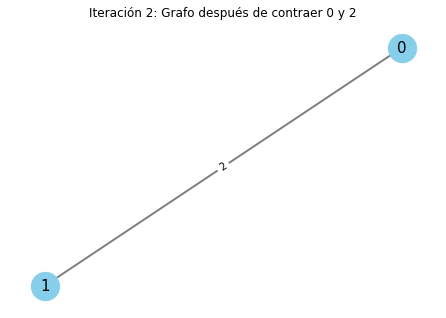

Iteracion 1


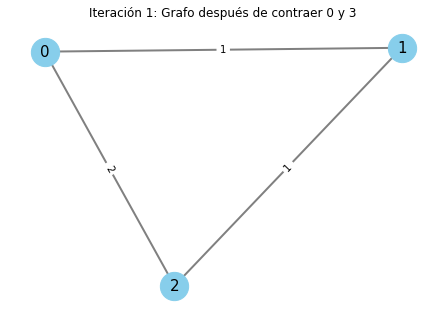

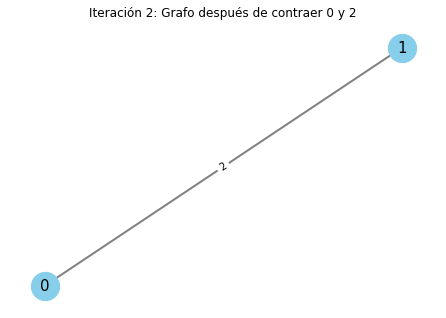

El corte mínimo encontrado por el algoritmo de Karger es: 2


In [2]:
# Definir las aristas del grafo con pesos iniciales de 1
edges = [(0, 1), (0, 2), (0, 3), (1, 2), (2, 3)]
    
# Crear el grafo con networkx
G = nx.Graph()
G.add_edges_from(edges)# Ejecutamos el algoritmo de Karger varias veces para aumentar la precisión

# Asignar peso 1 a cada arista
for (u, v) in edges:
    G[u][v]['weight'] = 1
    
trials = 100
min_cut = float('inf')

# Graficar el grafo original
pos = nx.spring_layout(G)
plot_graph(G, pos, title="Grafo original")

# Ejecutamos el algoritmo de Karger varias veces para aumentar la precisión
trials = 2
min_cut = float('inf')
    
for _ in range(trials):
    print("Iteracion " + str(_))
    cut = karger_min_cut_weighted(G, True)
    min_cut = min(min_cut, cut)
    
print("El corte mínimo encontrado por el algoritmo de Karger es:", min_cut)

1


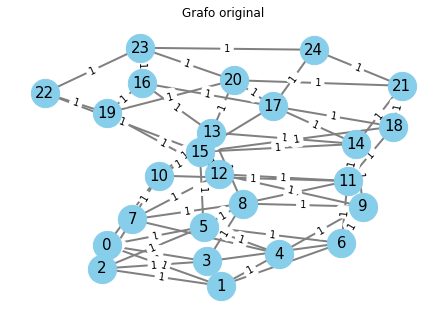

El corte mínimo encontrado por el algoritmo de Karger es: 3


In [3]:
edges = [
    (0, 1), (0, 2), (0, 3), (1, 2), (2, 3), (1, 4), (2, 5), (3, 6), (4, 5), (5, 6),
    (4, 7), (5, 8), (6, 9), (7, 8), (8, 9), (7, 10), (8, 11), (9, 12), (10, 11), 
    (11, 12), (10, 13), (11, 14), (12, 15), (13, 14), (14, 15), (13, 16), (14, 17), 
    (15, 18), (16, 17), (17, 18), (16, 19), (17, 20), (18, 21), (19, 20), (20, 21),
    (19, 22), (20, 23), (21, 24), (22, 23), (23, 24), (0, 5), (0, 10), (5, 15), (10, 15),
    (1, 6), (2, 7), (3, 8), (4, 9), (6, 11), (7, 12), (8, 13), (9, 14), (10, 17), 
    (11, 18), (12, 19), (13, 20), (14, 21), (15, 22), (16, 23), (17, 24)
]
# Crear el grafo con networkx
G = nx.Graph()
G.add_edges_from(edges)

# Asignar peso 1 a cada arista
for (u, v) in edges:
    G[u][v]['weight'] = 1
    
weight = G[1][2].get('weight', 1)    
print(weight)

# Graficar el grafo original
pos = nx.spring_layout(G)
plot_graph(G, pos, title="Grafo original")

# Ejecutamos el algoritmo de Karger varias veces para aumentar la precisión
trials = 100
min_cut = float('inf')
    
for _ in range(trials):
    cut = karger_min_cut_weighted(G, False)
    min_cut = min(min_cut, cut)
    
print("El corte mínimo encontrado por el algoritmo de Karger es:", min_cut)

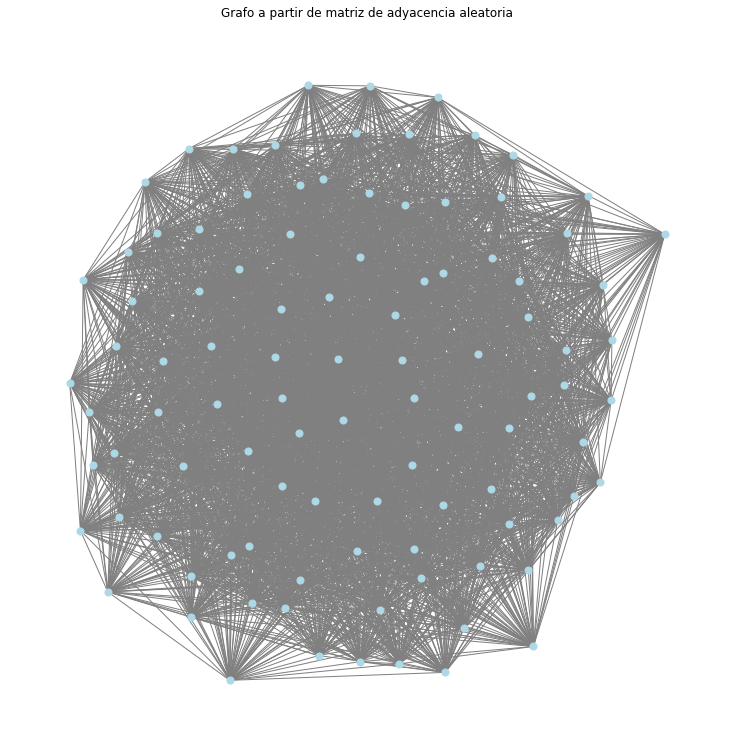

El corte mínimo encontrado por el algoritmo de Karger es: 53


In [4]:
import random
import networkx as nx
import matplotlib.pyplot as plt

# Parámetros para generar la matriz de adyacencia
n = 100  # número de nodos
p = 0.6  # probabilidad de crear una arista

# Generar la lista de adyacencia
adjacency_list = []
for i in range(n):
    for j in range(n):
        if i != j and random.random() >= p:
            adjacency_list.append((i, j))

# Crear el grafo con networkx
G = nx.Graph()
G.add_edges_from(adjacency_list)

# Dibujar el grafo
plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=False, node_color="lightblue", edge_color="gray", node_size=50)
plt.title("Grafo a partir de matriz de adyacencia aleatoria")
plt.show()

# Ejecutamos el algoritmo de Karger varias veces para aumentar la precisión
trials = 10
min_cut = float('inf')
    
for _ in range(trials):
    cut = karger_min_cut_weighted(G, False)
    min_cut = min(min_cut, cut)
    
print("El corte mínimo encontrado por el algoritmo de Karger es:", min_cut)